<a href="https://colab.research.google.com/github/hungbuile04/project-ML/blob/main/project-ML/model%20/SVM_TFIDF_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0


In [2]:
#Tải dữ liệu từ drive về thư mục tạm
import gdown
!mkdir -p content/data
# Download all files
file_ids = [
    '1JXdyh-UVveXhBToLJj8ZJNttiJif6zH8',  # X_train
    '1rtyLyNDBr3sPcyElMhpDPK3qTbNZH1YT',  # X_test
    '1IkNvEhPFfano0qSDZFWhsmpF3ttC1q0Y',  # y_train
    '1JlMWumYQP9OIH79dVsCiZ-eavZAhgSzv'   # y_test
]

file_paths = [
    'content/data/X_train.csv',
    'content/data/X_test.csv',
    'content/data/y_train.csv',
    'content/data/y_test.csv'
]
for file_id, file_path in zip(file_ids, file_paths):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JXdyh-UVveXhBToLJj8ZJNttiJif6zH8
To: /content/content/data/X_train.csv
100%|██████████| 5.03M/5.03M [00:00<00:00, 37.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rtyLyNDBr3sPcyElMhpDPK3qTbNZH1YT
To: /content/content/data/X_test.csv
100%|██████████| 1.34M/1.34M [00:00<00:00, 36.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IkNvEhPFfano0qSDZFWhsmpF3ttC1q0Y
To: /content/content/data/y_train.csv
100%|██████████| 16.9k/16.9k [00:00<00:00, 31.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JlMWumYQP9OIH79dVsCiZ-eavZAhgSzv
To: /content/content/data/y_test.csv
100%|██████████| 4.24k/4.24k [00:00<00:00, 7.32MB/s]


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

X_train = pd.read_csv('content/data/X_train.csv',header=0,keep_default_na=False)
X_test = pd.read_csv('content/data/X_test.csv',header=0,keep_default_na=False)
y_train = pd.read_csv('content/data/y_train.csv',header=0,keep_default_na=False)
y_test = pd.read_csv('content/data/y_test.csv',header=0,keep_default_na=False)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train = X_train.squeeze()
X_test = X_test.squeeze()
y_train = y_train.squeeze()
y_test = y_test.squeeze()

(8457, 1)
(2115, 1)
(8457, 1)
(2115, 1)


#Model 1: Using TF-IDF

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [6]:
#Take 1: using CountVectorizer
#cv = CountVectorizer()

#Take 2: TF-IDF
# Khởi tạo TfidfVectorizer với các tham số tối ưu
cv = TfidfVectorizer(
    max_features = 4000,
    stop_words='english',  # Loại bỏ stop words tiếng Anh
    ngram_range=(1, 2),   # Bao gồm unigrams và bigrams
    max_df=0.8,           # Loại bỏ từ xuất hiện trong hơn 80% tài liệu
    min_df=2              # Loại bỏ từ xuất hiện trong ít hơn 2 tài liệu
)
X_train_vectorized = cv.fit_transform(X_train)
X_test_vectorized = cv.transform(X_test)

# In số chiều của ma trận đặc trưng
print("Số chiều của ma trận huấn luyện (TF-IDF):", X_train_vectorized.shape[1])
print("Số chiều của ma trận kiểm tra (TF-IDF):", X_test_vectorized.shape[1])

Số chiều của ma trận huấn luyện (TF-IDF): 4000
Số chiều của ma trận kiểm tra (TF-IDF): 4000


In [7]:
#Huấn luyện mô hình
#Take 1: sử dụng tham số mặc định của SVC
# model = SVC(random_state = 0)
# model.fit(X_train_vectorized, y_train)

#Take 2: sử dụng GridSearchCV tối ưu tham số cho mô hình
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Định nghĩa lưới tham số cho GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],                    # Tham số phạt
    'kernel': ['linear', 'rbf'],          # Loại nhân
    'gamma': ['scale', 'auto', 0.1]       # Tham số gamma cho nhân rbf
}

# Khởi tạo mô hình SVC
base_model = SVC(random_state=0, class_weight='balanced')

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,                    # Số fold cho cross-validation
    scoring='f1_weighted',   # Tối ưu theo F1-score có trọng số
    n_jobs=-1,               # Sử dụng tất cả CPU
    verbose=1                # Hiển thị tiến trình
)

# Huấn luyện mô hình với GridSearchCV
grid_search.fit(X_train_vectorized, y_train)

# Lấy mô hình tốt nhất
model = grid_search.best_estimator_

# In tham số tốt nhất và điểm số
print("Tham số tốt nhất:", grid_search.best_params_)
print("F1-score tốt nhất (trên tập huấn luyện):", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Tham số tốt nhất: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
F1-score tốt nhất (trên tập huấn luyện): 0.9389987199419721


In [8]:
# Dự đoán trên tập test
y_pred = model.predict(X_test_vectorized)

# Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9456264775413712
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1566
           1       0.90      0.89      0.89       549

    accuracy                           0.95      2115
   macro avg       0.93      0.93      0.93      2115
weighted avg       0.95      0.95      0.95      2115



#Model 2: Combine with TF-IDF and Embedding

In [9]:
!pip install gdown==4.6.0
!pip install sentence-transformers
import logging
logging.getLogger("huggingface_hub").setLevel(logging.ERROR)
logging.getLogger("sentence_transformers.SentenceTransformer").setLevel(logging.ERROR)
import gdown
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack
from sentence_transformers import SentenceTransformer
import numpy as np

# Đọc file CSV
X_train = pd.read_csv('content/data/X_train.csv', header=0, keep_default_na=False).squeeze()
X_test = pd.read_csv('content/data/X_test.csv', header=0, keep_default_na=False).squeeze()
y_train = pd.read_csv('content/data/y_train.csv', header=0, keep_default_na=False).squeeze()
y_test = pd.read_csv('content/data/y_test.csv', header=0, keep_default_na=False).squeeze()

# Kiểm tra kích thước dữ liệu
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 1. Vector hóa văn bản bằng TF-IDF
tfidf = TfidfVectorizer(
    max_features = 4000,
    stop_words='english',
    ngram_range=(1, 2),
    max_df=0.8,
    min_df=2
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 2. Tạo embedding bằng all-MiniLM-L6-v2
model_embedding = SentenceTransformer('all-MiniLM-L6-v2')

# Tạo embedding cho train và test
X_train_emb = model_embedding.encode(X_train.tolist(), batch_size=32, show_progress_bar=True)
X_test_emb = model_embedding.encode(X_test.tolist(), batch_size=32, show_progress_bar=True)

# 3. Kết hợp TF-IDF và embedding
# Chuyển embedding thành ma trận sparse để kết hợp với TF-IDF
from scipy.sparse import csr_matrix
X_train_emb_sparse = csr_matrix(X_train_emb)
X_test_emb_sparse = csr_matrix(X_test_emb)

# Kết hợp đặc trưng
#TF-IDF: 4000 dimension & Embedding: 384 dimension
X_train_combined = hstack([X_train_tfidf, X_train_emb_sparse])
X_test_combined = hstack([X_test_tfidf, X_test_emb_sparse])

# 4. Huấn luyện mô hình SVM với GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1]
}

base_model = SVC(random_state=0, class_weight='balanced')
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# Huấn luyện
grid_search.fit(X_train_combined, y_train)

# Lấy mô hình tốt nhất
model = grid_search.best_estimator_

# In kết quả
print("Tham số tốt nhất:", grid_search.best_params_)
print("F1-score tốt nhất (trên tập huấn luyện):", grid_search.best_score_)

# 5. Dự đoán và đánh giá
y_pred = model.predict(X_test_combined)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

X_train shape: (8457,)
X_test shape: (2115,)
y_train shape: (8457,)
y_test shape: (2115,)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/265 [00:00<?, ?it/s]

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Tham số tốt nhất: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
F1-score tốt nhất (trên tập huấn luyện): 0.9691031864667605
Accuracy: 0.9687943262411347

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1566
           1       0.94      0.94      0.94       549

    accuracy                           0.97      2115
   macro avg       0.96      0.96      0.96      2115
weighted avg       0.97      0.97      0.97      2115



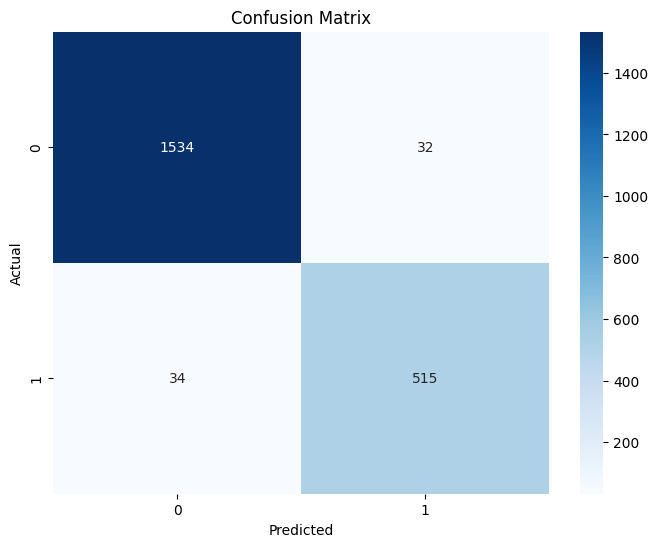

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()